In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acc = pd.read_csv("results.csv")
acc = acc[acc["epoch_no"] != 9]
def algorithm_name(old):
    if old == "tweet_shield_anonymized_trained_model":
        return "Anonymized"
    elif old == "tweet_shield_dp_trained_model":
        return "Differential Privacy"
    else:
        return "Normal"
acc["algorithm"] = acc["algorithm"].apply(algorithm_name)
acc = acc.rename(columns={"acc": "Accuracy", "epoch_no": "Epochs", "algorithm": "Algorithm"})
acc["Epochs"] = acc["Epochs"] + 1

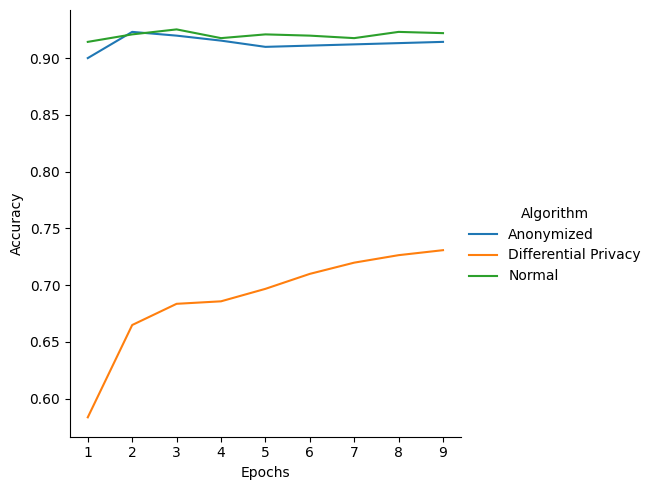

In [10]:
sns.relplot(data=acc,x="Epochs", y="Accuracy", hue="Algorithm", kind="line")
plt.savefig("acc.png")

In [8]:
privacy_budget = pd.read_csv("privacy_budgets.csv")
privacy_budget["Epochs"] = privacy_budget["steps"]/1363
privacy_budget["Privacy Budget"] = privacy_budget["prvs"]

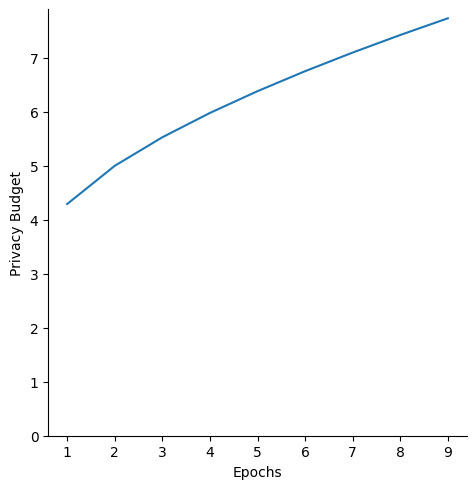

In [11]:
sns.relplot(data=privacy_budget, x="Epochs", y="Privacy Budget", kind="line")
plt.ylim(bottom=0)
plt.savefig("privacy_budget.png")